**Author: Emma HONG**

In [ ]:
  ! pip install git+https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to /tmp/pip-req-build-n2sqq80q
  Running command git clone --filter=blob:none --quiet https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git /tmp/pip-req-build-n2sqq80q
  Resolved https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to commit bdbddee93a6d59029989c32cc41748adb2724f51
  Preparing metadata (setup.py) ... done


# Initialize the Environment

In [ ]:
# Import the necessary libraries

# General libraries
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import sys
from collections import defaultdict

# Game related libraries
import gymnasium as gym
import text_flappy_bird_gym
import IPython

# Visualization
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
# Explore the environment
# The agent should pass several pipes. If the agent is alive and firt pipe is behind score a point.
# So the larger the sum of scores the better.
# Plus: As long as the agent stays alive the cummulative reward is increased for each step

# The environment predefined the start point and also defined end conditions

# - Observation: A matrix which represents the postion of different entities: 
# 0 for environment, 1 for agent, 2 for dangers
# - Info: {'score': 0, 'player': [6, 7]} score and coordinate of the agent
# Action dictionary: {0:'Idle', 1:'Flap'}

if __name__ == '__main__':

    # initiate environment
    env = gym.make('TextFlappyBird-screen-v0', height = 15, width = 20, pipe_gap = 4)
    obs = env.reset()
    out = display(IPython.display.Pretty(''), display_id=True)
    # iterate
    while True:
        # Select next action
        action = env.action_space.sample()  # for an agent, action = agent.policy(observation)

        # Appy action and return new observation of the environment
        obs, reward, done, _, info = env.step(action)

        # Render the game
        out.update(IPython.display.Pretty(env.render()))
        time.sleep(0.5) # FPS

        # If player is dead break
        if done:
            break

    env.close()


Text Flappy Bird!
Score: 0
----------------------
[       |         |  ]
[       |         |  ]
[       |         |  ]
[       |            ]
[       |            ]
[       |            ]
[       |            ]
[       |         |  ]
[       |         |  ]
[       |         |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[     * |         |  ]
^^^^^^^^^^^^^^^^^^^^^^
(Idle)


# Compare the environment

In [ ]:
# Compare both environments
 # initiate environment
env_screen = gym.make('TextFlappyBird-screen-v0', height = 15, width = 20, pipe_gap = 4)
obs_screen = env_screen.reset()
print(obs_screen)
print()
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
obs = env.reset()
print(obs)

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0

/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:35: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (20, 15)
  logger.warn(


In [ ]:
# Compare the original game environment
# Flappy Bird(Simple version)
def _get_observation(self):
    '''The function returns h_dist and v_dist
    h_dist represents the horizontal distance between the player's position and the center of the gap
    v_dist represents the vertical distance.'''

    up_pipe = low_pipe = None
    h_dist = 0
    for up_pipe, low_pipe in zip(self._game.upper_pipes,
                                  self._game.lower_pipes):
        h_dist = (low_pipe["x"] + PIPE_WIDTH / 2
                  - (self._game.player_x - PLAYER_WIDTH / 2))
        h_dist += 3  # extra distance to compensate for the buggy hit-box
        if h_dist >= 0:
            break

    upper_pipe_y = up_pipe["y"] + PIPE_HEIGHT
    lower_pipe_y = low_pipe["y"]
    player_y = self._game.player_y

    v_dist = (upper_pipe_y + lower_pipe_y) / 2 - (player_y
                                                  + PLAYER_HEIGHT/2)

    if self._normalize_obs:
        h_dist /= self._screen_size[0]
        v_dist /= self._screen_size[1]

    return np.array([
        h_dist,
        v_dist,
    ])

# Text Flappy Bird(Simple Version)
def _get_observation(self):
    """
    The horizontal and vertical distance between the player and the center of the gap is returned as observation
    """
    closest_upcoming_pipe = min([i for i,p in enumerate([pipe['x'] - self._game.player_x for pipe in self._game.upper_pipes]) if p>=0])
    x_dist = self._game.upper_pipes[closest_upcoming_pipe]['x'] - self._game.player_x
    y_dist = self._game.player_y-self._game.upper_pipes[closest_upcoming_pipe]['y']-self._pipe_gap//2

    return (x_dist,y_dist)


# First Agent: Q-learning

In [ ]:
# Build the random agent for later comparison
class RandomAgent():
    """
    The Random Agent Class
    
    """
    def __init__(self, eps, step_size, discount):
        self.eps = 1
        self.step_size = 1
        self.discount = 1
        
    def agent_act(self, state): 
        action = env.action_space.sample()
        return action

The first agent will apply the q-learning algorithm with a 
$\epsilon$-greedy approach like what we did in the lab.

In [ ]:
# Define the Q-learning class
class QLearningAgent():
    def agent_init(self, agent_init_info):
        """Setup for the agent called when the experiment first starts.
        
        Args:
        agent_init_info (dict), the parameters used to initialize the agent. The dictionary contains:
        {
            num_actions (int): The number of actions,
            epsilon (float): The epsilon parameter for exploration,
            eps_decay (float): The decay rate of the epsilon parameter,
            step_size (float): The step-size, learning rate
            discount (float): The discount factor
        }
        
        """
        # Store the parameters provided in agent_init_info
        self.num_actions = agent_init_info["num_actions"]
        self.epsilon = agent_init_info["epsilon"]
        self.eps_decay = agent_init_info["eps_decay"]
        self.step_size = agent_init_info["step_size"]
        self.discount = agent_init_info["discount"]
        self.rand_generator = np.random.RandomState(agent_init_info["seed"])
        self.action = 0
        
        # Create a dictionary to store the action-value estimates
        self.q = defaultdict(lambda: np.zeros(2))  
    
    def agent_act(self,state):
        # Define the function to generate 𝜖 -greedy action

        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(self.q[state])
        return action

    def agent_step(self):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (int): the current state
            action (int): current action
        """
        
        # Perform an update
        self.q[state][action] += self.step_size * (reward + self.discount * np.max(self.q[next_state]) - self.q[state][action])    

        # Decay for the epsilon
        self.epsilon = max(self.epsilon * self.eps_decay, 0.03) 
    
    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """
        top = float("-inf")
        ties = []

        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)
        # If we use the argmax function defined by numpy, the index will always be the same
        return self.rand_generator.choice(ties)

100%|██████████| 10000/10000 [00:28<00:00, 348.01it/s]


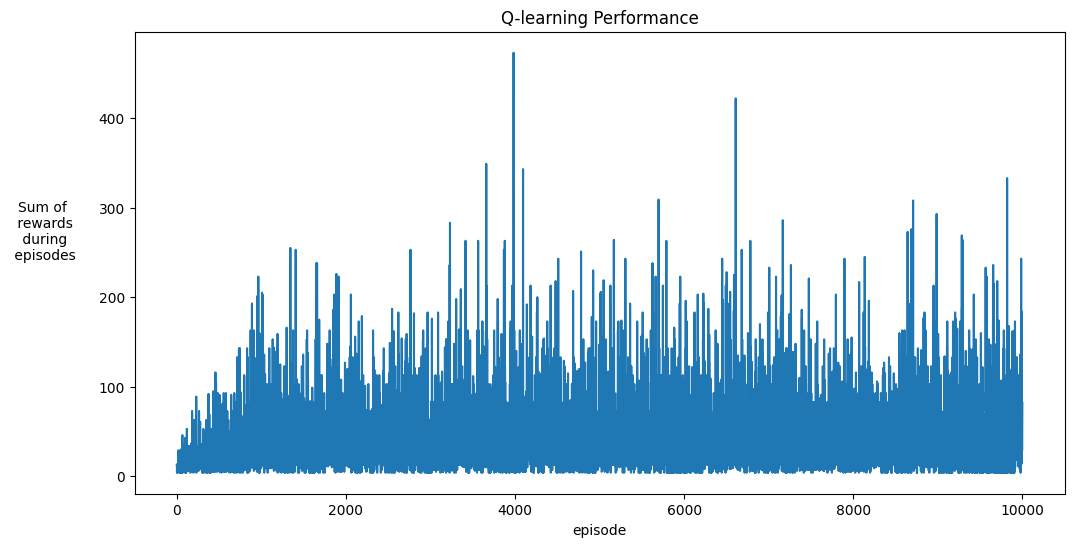

In [ ]:
# Baseline
agent = QLearningAgent()
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
all_reward_sums = [] # Contains sum of rewards during episode
all_scores = [] # Contains the scores for each run
agent_info = {"num_actions": 2, "epsilon": 0.2, "eps_decay":1, "step_size": 0.7, "discount": 1.0,"seed":42}
agent.agent_init(agent_info)

# Set the value that is big enough to see the converge
num_episodes = 10000 # The number of episodes in each run

for episode in tqdm(range(num_episodes)):

    # Initialize done to False
    done = False

    reward_sums = []

    state, info = env.reset()
    while not done:
      action = agent.agent_act(state)
      next_state, reward, done, _, info = env.step(action)
      
      agent.agent_step()
      state = next_state

      reward_sums.append(reward)

      # If terminal state
      if done:
        break

    all_reward_sums.append(np.sum(reward_sums))
    all_scores.append(info["score"])

Q_learning_svf = agent.q

# save results
import os
import shutil
os.makedirs('results_q', exist_ok=True)
np.save('results_q/q_learning.npy', all_reward_sums)
shutil.make_archive('results_q', 'zip', '.', 'results_q')

# Plot the results
x = np.arange(num_episodes)
plt.figure(figsize=(12, 6))
plt.plot(x, all_reward_sums)
plt.title("Q-learning Performance")
plt.xlabel("episode")
plt.ylabel("Sum of\n rewards\n during\n episodes",rotation=0, labelpad=40)
plt.show()

# Second Agent: Expected Sarsa

In [ ]:
# Define the Expected Sarsa Agent
class ExpectedSarsaAgent():
    def agent_init(self, agent_init_info):
        """Setup for the agent called when the experiment first starts.
        
        Args:
        agent_init_info (dict), the parameters used to initialize the agent. The dictionary contains:
        {
            num_actions (int): The number of actions,
            epsilon (float): The epsilon parameter for exploration,
            eps_decay (float): The decay rate of the epsilon parameter,
            step_size (float): The step-size,
            discount (float): The discount factor,
        }
        
        """
        # Store the parameters provided in agent_init_info.
        self.num_actions = agent_init_info["num_actions"]
        self.epsilon = agent_init_info["epsilon"]
        self.eps_decay = agent_init_info["eps_decay"]
        self.step_size = agent_init_info["step_size"]
        self.discount = agent_init_info["discount"]
        self.rand_generator = np.random.RandomState(agent_info["seed"])
        
        # Create an array for action-value estimates and initialize it to zero.
        self.q = defaultdict(lambda: np.zeros(2))  

    def agent_act(self,state):
        # Define the function to generate 𝜖 -greedy action

        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(self.q[state])
        return action

    def agent_step(self):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (int): the current state
            action (int): current action
        """
        
        # Perform an update 
        # Expected Sarsa: Vs' = SUMa(policy(s',a)*Q(s',a))
        # Q(s,a) = Q(s,a) + step_size * (reward + epsilon*Vs' - Q(s,a))

        expected_q = 0
        max_q = np.max(self.q[next_state])

        pi = np.ones(self.num_actions) * self.epsilon / self.num_actions + (self.q[next_state] == max_q) * (1 - self.epsilon) / np.sum(self.q[next_state] == max_q) # Compute the probability of choosing the greedy action
           
        expected_q = np.sum(self.q[next_state] * pi)
        self.q[state][action] += self.step_size * (reward + self.discount * expected_q - self.q[state][action])

        # Decay for the epsilon
        self.epsilon = max(self.epsilon * self.eps_decay, 0.03) 

    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """
        top = float("-inf")
        ties = []

        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return self.rand_generator.choice(ties)

100%|██████████| 10000/10000 [01:21<00:00, 123.44it/s]


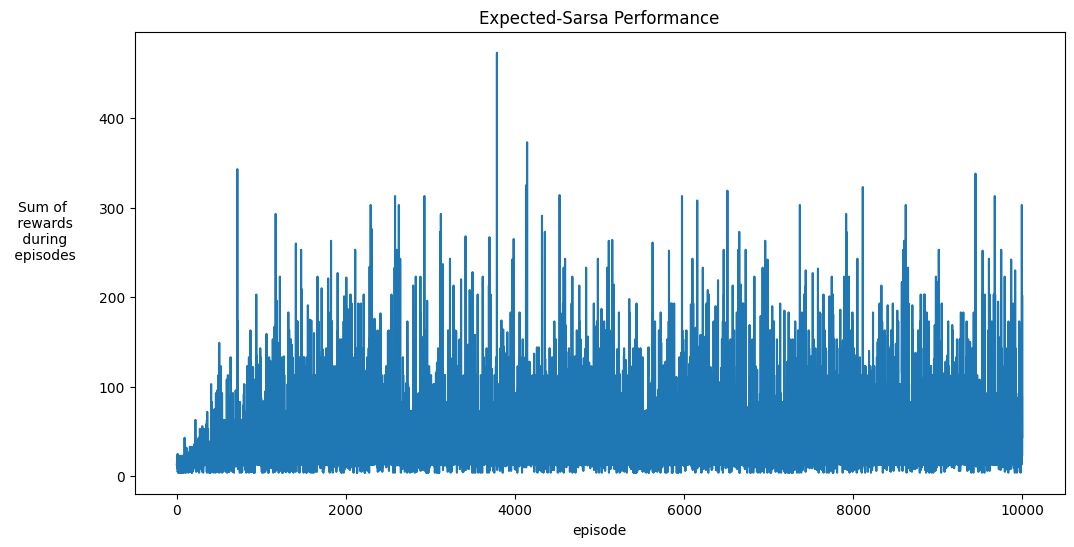

In [ ]:
# Baseline
agent = ExpectedSarsaAgent()
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
all_reward_sums = [] # Contains sum of rewards during episode
all_scores = [] # Contains the scores for each run
agent_info = {"num_actions": 2, "epsilon": 0.2, "eps_decay":1, "step_size": 0.7, "discount": 1.0,"seed":42}
agent.agent_init(agent_info)

# Set the value that is big enough to see the converge
num_episodes = 10000 # The number of episodes in each run

for episode in tqdm(range(num_episodes)):

    # Initialize done to False
    done = False

    reward_sums = []

    state, info = env.reset()
    while not done:
        action = agent.agent_act(state)
        next_state, reward, done, _, info = env.step(action)
        #For SARSA to acquire the on-policy next action
        next_action = agent.agent_act(next_state)
        
        agent.agent_step()
        state = next_state

        reward_sums.append(reward)

        # If terminal state
        if done:
            break

    all_reward_sums.append(np.sum(reward_sums))
    all_scores.append(info["score"])

Esarsa_learning_svf = agent.q

# save results
import os
import shutil
os.makedirs('results_e', exist_ok=True)
np.save('results_e/E_Sarsa.npy', all_reward_sums)
shutil.make_archive('results_e', 'zip', '.', 'results_e')

# Plot the results
x = np.arange(num_episodes)
plt.figure(figsize=(12, 6))
plt.plot(x, all_reward_sums)
plt.title("Expected-Sarsa Performance")
plt.xlabel("episode")
plt.ylabel("Sum of\n rewards\n during\n episodes",rotation=0, labelpad=40)
plt.show()

# Hyperparameter tuning

## Epsilon

In [ ]:
# Compare the performance of different epsilon
# The random actions can't be too frequent, so we won't even try epilon more than 0.3
epsilons = [0.01,0.05,0.1, 0.15,0.2,0.25,0.3]

agents = {
    "Q-learning": QLearningAgent(),
    "E-Sarsa": ExpectedSarsaAgent()}

env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)

all_reward_sums = {} # Contains sum of rewards during episode for both algorithms

for algorithm in ["Q-learning","E-Sarsa"]:
    for eps in tqdm(epsilons):
        all_reward_sums[(algorithm,eps)] = []

        agent = agents[algorithm]
        agent_info = {"num_actions": 2, "epsilon": eps, "eps_decay":1, "step_size": 0.4, "discount": 1,"seed":42}
        agent.agent_init(agent_info)

        for episode in range(3000):
            
            # Initialize done to False
            done = False
            
            reward_sums = []

            state, info = env.reset()
            while not done:
                action = agent.agent_act(state)
                next_state, reward, done, _, info = env.step(action)
                #For SARSA to acquire the on-policy next action
                next_action = agent.agent_act(next_state)
                
                agent.agent_step()
                state = next_state

                reward_sums.append(reward)

                # If terminal state
                if done:
                    break
            all_reward_sums[(algorithm,eps)].append(np.sum(reward_sums))

100%|██████████| 7/7 [02:27<00:00, 21.08s/it]


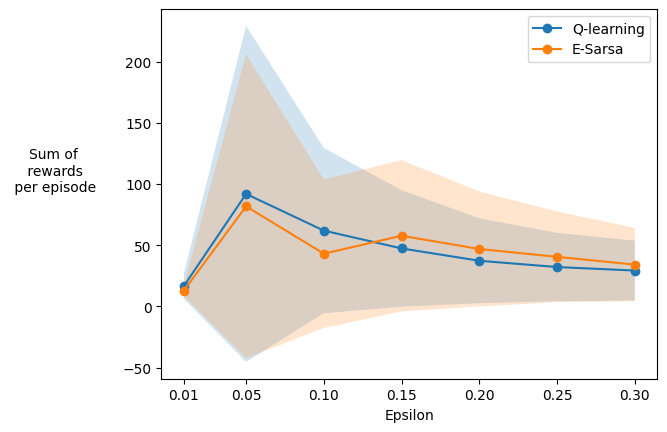

In [ ]:
# Plot the results
for algorithm in ["Q-learning","E-Sarsa"]:
    algorithm_means = np.array([np.mean(all_reward_sums[(algorithm,eps)]) for eps in epsilons])
    algorithm_stds = np.array([np.std(all_reward_sums[(algorithm,eps)]) for eps in epsilons])
    plt.plot(epsilons, algorithm_means, marker='o', linestyle='solid', label=algorithm)
    plt.fill_between(epsilons, algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.2)
plt.legend()
plt.xlabel("Epsilon")
plt.ylabel("Sum of\n rewards\n per episode",rotation=0, labelpad=50)
plt.xticks(epsilons)
plt.show()

Both algorithms peaked at 0.05.

## Step size

In [ ]:
# Compare the performance of different step size(learning rate)
step_sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

agents = {
    "Q-learning": QLearningAgent(),
    "E-Sarsa": ExpectedSarsaAgent()}

env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)

all_reward_sums = {} # Contains sum of rewards during episode for both algorithms

for algorithm in ["Q-learning","E-Sarsa"]:
    for sz in tqdm(step_sizes):
        all_reward_sums[(algorithm,sz)] = []

        agent = agents[algorithm]
        # Put back the baseline parameter to let the model converge faster
        agent_info = {"num_actions": 2, "epsilon": 0.05, "eps_decay":1, "step_size": sz, "discount": 1,"seed":42}
        agent.agent_init(agent_info)

        for run in range(3000):
            
            # Initialize done to False
            done = False
            
            reward_sums = []

            state, info = env.reset()
            while not done:
                action = agent.agent_act(state)
                next_state, reward, done, _, info = env.step(action)
                #For SARSA to acquire the on-policy next action
                next_action = agent.agent_act(next_state)
                
                agent.agent_step()
                state = next_state

                reward_sums.append(reward)

                # If terminal state
                if done:
                    break
            all_reward_sums[(algorithm,sz)].append(np.sum(reward_sums))

100%|██████████| 10/10 [01:52<00:00, 11.23s/it]


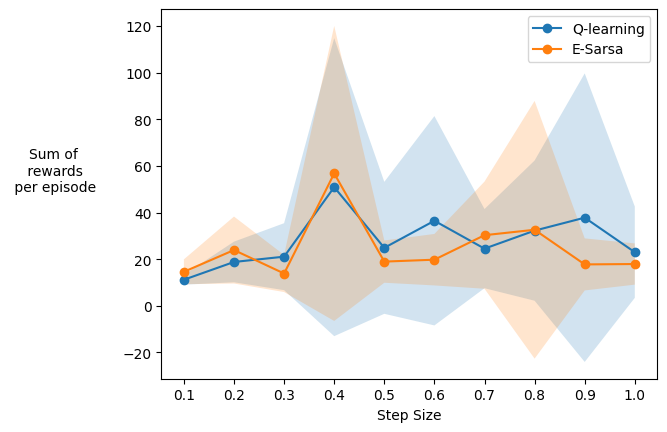

In [ ]:
# Plot the results
for algorithm in ["Q-learning","E-Sarsa"]:
    algorithm_means = np.array([np.mean(all_reward_sums[(algorithm,sz)]) for sz in step_sizes])
    algorithm_stds = np.array([np.std(all_reward_sums[(algorithm,sz)]) for sz in step_sizes])
    plt.plot(step_sizes, algorithm_means, marker='o', linestyle='solid', label=algorithm)
    plt.fill_between(step_sizes, algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.2)
plt.legend()
plt.xlabel("Step Size")
plt.ylabel("Sum of\n rewards\n per episode",rotation=0, labelpad=50)
plt.xticks(step_sizes)
plt.show()

Expected Sarsa and Q-learning peaked at 0.4. 

## Epsilon decay

In [ ]:
# Compare the performance of different epsilon decay rates
# I will keep the parameter of baseline model to train model faster
epsilon_decay = [0.999,0.9999,0.99999,1]

agents = {
    "Q-learning": QLearningAgent(),
    "E-Sarsa": ExpectedSarsaAgent()}

env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)

all_reward_sums = {} # Contains sum of rewards during episode for both algorithms

for algorithm in ["Q-learning","E-Sarsa"]:
    for eps_d in tqdm(epsilon_decay):
        all_reward_sums[(algorithm,eps_d)] = []

        agent = agents[algorithm]
        agent_info = {"num_actions": 2, "epsilon": 0.1, "eps_decay":eps_d, "step_size": 0.4, "discount": 1,"seed":42}
        agent.agent_init(agent_info)
        # 10000 is too large and slow to train
        for run in range(3000):
            
            # Initialize done to False
            done = False
            
            reward_sums = []

            state, info = env.reset()
            while not done:
                action = agent.agent_act(state)
                next_state, reward, done, _, info = env.step(action)
                #For SARSA to acquire the on-policy next action
                next_action = agent.agent_act(next_state)
                
                agent.agent_step()
                state = next_state

                reward_sums.append(reward)

                # If terminal state
                if done:
                    break
            all_reward_sums[(algorithm,eps_d)].append(np.sum(reward_sums))

100%|██████████| 4/4 [02:33<00:00, 38.34s/it]


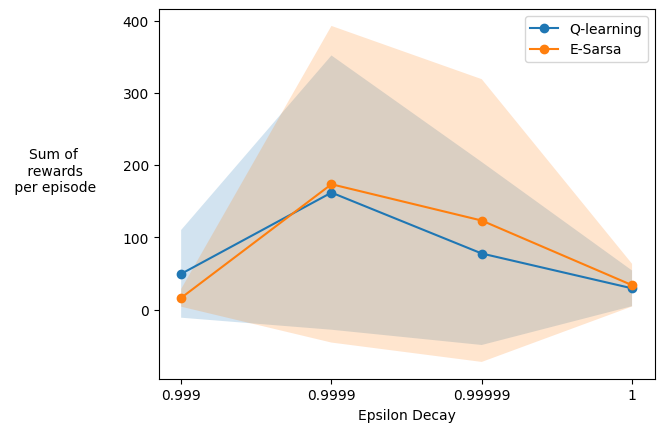

In [ ]:
# Plot the results
for algorithm in ["Q-learning","E-Sarsa"]:
    algorithm_means = np.array([np.mean(all_reward_sums[(algorithm,eps_d)]) for eps_d in epsilon_decay])
    algorithm_stds = np.array([np.std(all_reward_sums[(algorithm,eps_d)]) for eps_d in epsilon_decay])
    plt.plot(range(len(epsilon_decay)), algorithm_means, marker='o', linestyle='solid', label=algorithm)
    plt.fill_between(range(len(epsilon_decay)), algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.2)
plt.legend()
plt.xlabel("Epsilon Decay")
plt.ylabel("Sum of\n rewards\n per episode",rotation=0, labelpad=50)
plt.xticks(range(len(epsilon_decay)), [str(val) for val in epsilon_decay])
plt.show()

Q-learning reached the highest result at 0.99999 while Expected-Sarsa peaked at 1.

## Discount

In [ ]:
# Compare the performance of different discount rates
discounts = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

agents = {
    "Q-learning": QLearningAgent(),
    "E-Sarsa": ExpectedSarsaAgent()}

env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)

all_reward_sums = {} # Contains sum of rewards during episode for both algorithms

for algorithm in ["Q-learning","E-Sarsa"]:
    for d in tqdm(discounts):
        all_reward_sums[(algorithm,d)] = []

        agent = agents[algorithm]
        agent_info = {"num_actions": 2, "epsilon": 0.05, "eps_decay":1, "step_size": 0.4, "discount": d,"seed":42}
        agent.agent_init(agent_info)

        for run in range(3000):
            
            # Initialize done to False
            done = False
            
            reward_sums = []

            state, info = env.reset()
            while not done:
                action = agent.agent_act(state)
                next_state, reward, done, _, info = env.step(action)
                #For SARSA to acquire the on-policy next action
                next_action = agent.agent_act(next_state)
                
                agent.agent_step()
                state = next_state

                reward_sums.append(reward)

                # If terminal state
                if done:
                    break
            all_reward_sums[(algorithm,d)].append(np.sum(reward_sums))

100%|██████████| 10/10 [02:25<00:00, 14.52s/it]


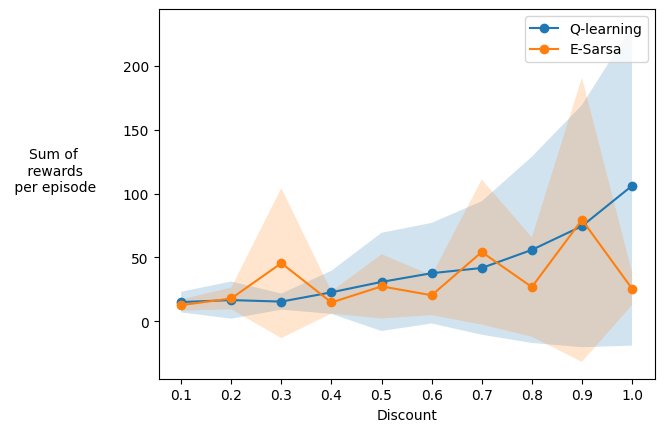

In [ ]:
# Plot the results
for algorithm in ["Q-learning","E-Sarsa"]:
    algorithm_means = np.array([np.mean(all_reward_sums[(algorithm,d)]) for d in discounts])
    algorithm_stds = np.array([np.std(all_reward_sums[(algorithm,d)]) for d in discounts])
    plt.plot(discounts, algorithm_means, marker='o', linestyle='solid', label=algorithm)
    plt.fill_between(discounts, algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.2)
plt.legend()
plt.xlabel("Discount")
plt.ylabel("Sum of\n rewards\n per episode",rotation=0, labelpad=50)
plt.xticks(discounts)
plt.show()

Expected reached the highest value with discount 0.9 and Q-learning performed better with no discount, that is 1

# Compare the performance of tuned models

In [ ]:
# Best hyperparameter combination

agents = {
    "Q-learning": QLearningAgent(),
    "E-Sarsa": ExpectedSarsaAgent()}

env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)

all_reward_sums = {} # Contains sum of rewards during episode for both algorithms
all_scores = {} # Contains the scores for during episode for both algorithms
all_q_tables = {}

for algorithm in ["Q-learning","E-Sarsa"]:
    all_reward_sums[algorithm] = []
    all_scores[algorithm] = []

    agent = agents[algorithm]
    # Still put epsilon and epsilon decay at default value to let the model train faster
    if algorithm == "Q-learning":
        agent_info = {"num_actions": 2, "epsilon": 0.05, "eps_decay":0.9999, "step_size": 0.4, "discount": 1,"seed":42}
    else:
        agent_info = {"num_actions": 2, "epsilon": 0.05, "eps_decay":0.9999, "step_size": 0.4, "discount": 0.9,"seed":42}

    agent.agent_init(agent_info)

    for run in tqdm(range(10000)):
        
        # Initialize done to False
        done = False
        
        reward_sums = []

        state, info = env.reset()
        while not done:
            action = agent.agent_act(state)
            next_state, reward, done, _, info = env.step(action)
            #For SARSA to acquire the on-policy next action
            next_action = agent.agent_act(next_state)
            
            agent.agent_step()
            state = next_state

            reward_sums.append(reward)

            # If terminal state
            if done:
                break
        all_reward_sums[algorithm].append(np.sum(reward_sums))
        all_q_tables[algorithm] = agent.q
        all_scores[algorithm].append(info["score"])



100%|██████████| 10000/10000 [05:10<00:00, 32.16it/s]


In [ ]:
# Add the random agent to compare the difference

all_reward_sums["Random-Agent"] = []
all_scores["Random-Agent"] = []

agent = RandomAgent(1,1,1)

for run in tqdm(range(10000)):
    
    # Initialize done to False
    done = False
    
    reward_sums = []

    state, info = env.reset()
    while not done:
        action = agent.agent_act(state)
        next_state, reward, done, _, info = env.step(action)
        state = next_state
        reward_sums.append(reward)

        # If terminal state
        if done:
            break
    all_reward_sums["Random-Agent"].append(np.sum(reward_sums))
    all_scores["Random-Agent"].append(info["score"])


100%|██████████| 10000/10000 [00:02<00:00, 3828.07it/s]


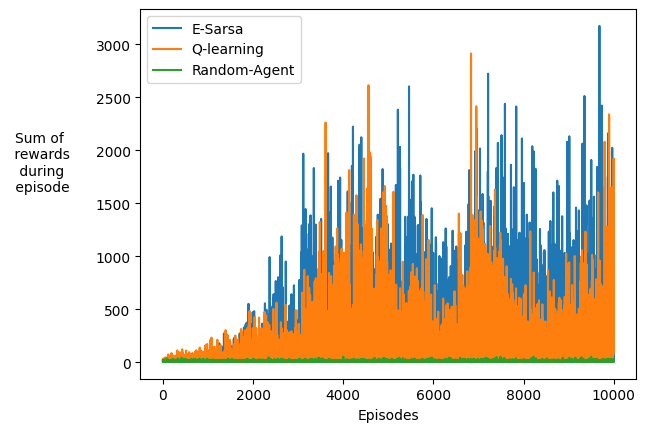

In [ ]:
# Plot both models in the same graph to compare - by rewards
for algorithm in ["E-Sarsa","Q-learning", "Random-Agent"]:
    plt.plot(all_reward_sums[algorithm], label=algorithm)
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode",rotation=0, labelpad=40)
plt.legend()
plt.show()

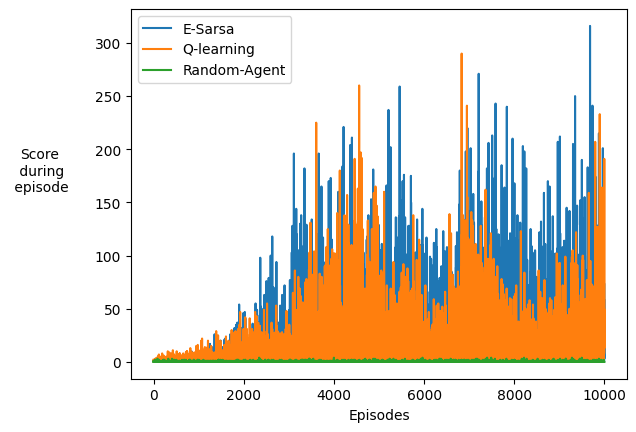

In [ ]:
# Plot both models in the same graph to compare - by score(linear to rewards)
for algorithm in ["E-Sarsa","Q-learning", "Random-Agent"]:
    plt.plot(all_scores[algorithm], label=algorithm)
plt.xlabel("Episodes")
plt.ylabel("Score\n during\n episode",rotation=0, labelpad=40)
plt.legend()
plt.show()

# State-Value Function Plots

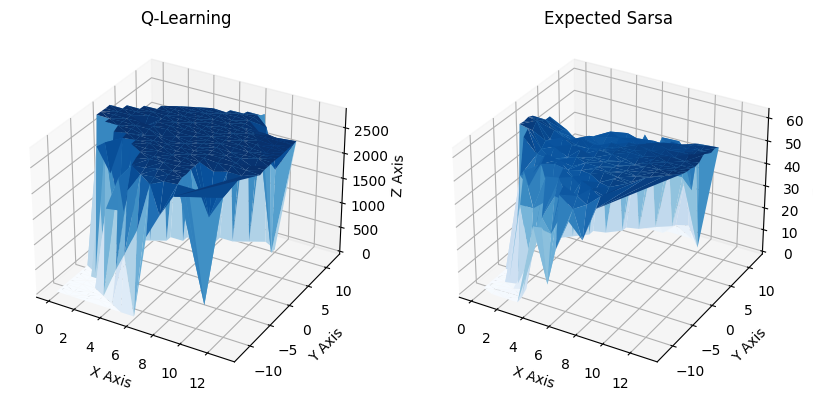

In [ ]:
# Print the state value functions of both agents (Based on baseline model)

def extract_values(dictionary):
    x_values = [key[0] for key in dictionary.keys()]
    y_values = [key[1] for key in dictionary.keys()]
    z_values = list(dictionary.values())
    return x_values, y_values, z_values

q_policy_values = dict((k,np.max(v)) for k, v in Q_learning_svf.items())
e_sarsa_values = dict((k,np.max(v)) for k, v in Esarsa_learning_svf.items())

x_list, y_list, z_list = extract_values(q_policy_values)
x_list1, y_list1, z_list1 = extract_values(e_sarsa_values)

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), subplot_kw={'projection': '3d'})
ax1 = axs[0]
ax2 = axs[1]

ax1.plot_trisurf(x_list, y_list, z_list, cmap='Blues')
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')
ax1.set_title('Q-Learning')

ax2.plot_trisurf(x_list1, y_list1, z_list1, cmap='Blues')
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')
ax2.set_zlabel('Z Axis')
ax2.set_title('Expected Sarsa')

plt.show()



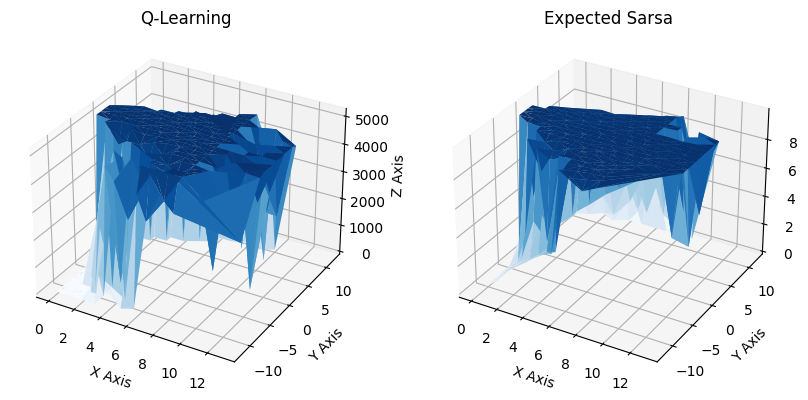

In [ ]:
# Best model

q_policy_values = dict((k,np.max(v)) for k, v in all_q_tables["Q-learning"].items())
e_sarsa_values = dict((k,np.max(v)) for k, v in all_q_tables["E-Sarsa"].items())

x_list, y_list, z_list = extract_values(q_policy_values)
x_list1, y_list1, z_list1 = extract_values(e_sarsa_values)

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), subplot_kw={'projection': '3d'})
ax1 = axs[0]
ax2 = axs[1]

ax1.plot_trisurf(x_list, y_list, z_list, cmap='Blues')
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')
ax1.set_title('Q-Learning')

ax2.plot_trisurf(x_list1, y_list1, z_list1, cmap='Blues')
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')
ax2.set_zlabel('Z Axis')
ax2.set_title('Expected Sarsa')

plt.show()
